# Heart Attack Analysis and Prediction

### DataSet: 
https://www.kaggle.com/datasets/rashikrahmanpritom/heart-attack-analysis-prediction-dataset?resource=download&select=heart.csv
    

In [5]:
# Importing the libraries

import numpy as np    
import pandas as pd 
import matplotlib.pyplot as plt
import seaborn as sns

In [6]:
heart_df = pd.read_csv("heart.csv.xls")

In [7]:
heart_df

,age,sex,cp,trtbps,chol,fbs,restecg,thalachh,exng,oldpeak,slp,caa,thall,output
0,63,1,3,145,233,1,0,150,0,2.3,0,0,1,1
1,37,1,2,130,250,0,1,187,0,3.5,0,0,2,1
2,41,0,1,130,204,0,0,172,0,1.4,2,0,2,1
3,56,1,1,120,236,0,1,178,0,0.8,2,0,2,1
4,57,0,0,120,354,0,1,163,1,0.6,2,0,2,1
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
298,57,0,0,140,241,0,1,123,1,0.2,1,0,3,0
299,45,1,3,110,264,0,1,132,0,1.2,1,0,3,0
300,68,1,0,144,193,1,1,141,0,3.4,1,2,3,0
301,57,1,0,130,131,0,1,115,1,1.2,1,1,3,0


In [8]:
o2Saturation_df = pd.read_csv("o2Saturation.csv.xls")

In [9]:
o2Saturation_df

,98.6
0,98.6
1,98.6
2,98.6
3,98.1
4,97.5
...,...
3580,98.6
3581,98.6
3582,98.6
3583,98.6


# Pre-Processing Steps

### For the heart.csv file

### Changing column names for easier interpretation 

In [10]:
heart_df.dtypes

age           int64
sex           int64
cp            int64
trtbps        int64
chol          int64
fbs           int64
restecg       int64
thalachh      int64
exng          int64
oldpeak     float64
slp           int64
caa           int64
thall         int64
output        int64
dtype: object

In [11]:
dict = {'cp' : 'Chest Pain Type',
        'trtbps' : 'Resting bp',
        'chol': 'Cholesterol',
        'fbs': 'Fasting Blood sugar',
        'restecg' : 'Resting ECG',
        'thalachh' : 'Max Heart rate',
        'exng' : 'Exercise induced angina',
        'oldpeak' : 'Previous peak',
        'slp' : 'slope',
        'caa' : 'no. of major vessels',
        'thall' : 'thal rate',
        'output' : 'target variable'
       }

heart_df.rename(columns = dict, inplace = True)


In [12]:
heart_df.dtypes

age                          int64
sex                          int64
Chest Pain Type              int64
Resting bp                   int64
Cholesterol                  int64
Fasting Blood sugar          int64
Resting ECG                  int64
Max Heart rate               int64
Exercise induced angina      int64
Previous peak              float64
slope                        int64
no. of major vessels         int64
thal rate                    int64
target variable              int64
dtype: object

### Checking for null values and removing them

In [13]:
heart_df.dropna()

,age,sex,Chest Pain Type,Resting bp,Cholesterol,Fasting Blood sugar,Resting ECG,Max Heart rate,Exercise induced angina,Previous peak,slope,no. of major vessels,thal rate,target variable
0,63,1,3,145,233,1,0,150,0,2.3,0,0,1,1
1,37,1,2,130,250,0,1,187,0,3.5,0,0,2,1
2,41,0,1,130,204,0,0,172,0,1.4,2,0,2,1
3,56,1,1,120,236,0,1,178,0,0.8,2,0,2,1
4,57,0,0,120,354,0,1,163,1,0.6,2,0,2,1
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
298,57,0,0,140,241,0,1,123,1,0.2,1,0,3,0
299,45,1,3,110,264,0,1,132,0,1.2,1,0,3,0
300,68,1,0,144,193,1,1,141,0,3.4,1,2,3,0
301,57,1,0,130,131,0,1,115,1,1.2,1,1,3,0


### Concise Summary of the Heart DataFrame

In [14]:
heart_df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 303 entries, 0 to 302
Data columns (total 14 columns):
 #   Column                   Non-Null Count  Dtype  
---  ------                   --------------  -----  
 0   age                      303 non-null    int64  
 1   sex                      303 non-null    int64  
 2   Chest Pain Type          303 non-null    int64  
 3   Resting bp               303 non-null    int64  
 4   Cholesterol              303 non-null    int64  
 5   Fasting Blood sugar      303 non-null    int64  
 6   Resting ECG              303 non-null    int64  
 7   Max Heart rate           303 non-null    int64  
 8   Exercise induced angina  303 non-null    int64  
 9   Previous peak            303 non-null    float64
 10  slope                    303 non-null    int64  
 11  no. of major vessels     303 non-null    int64  
 12  thal rate                303 non-null    int64  
 13  target variable          303 non-null    int64  
dtypes: float64(1), int64(13)
m

### Summary Statistics 

In [15]:
heart_df.describe().transpose()

,count,mean,std,min,25%,50%,75%,max
age,303.0,54.366337,9.082101,29.0,47.5,55.0,61.0,77.0
sex,303.0,0.683168,0.466011,0.0,0.0,1.0,1.0,1.0
Chest Pain Type,303.0,0.966997,1.032052,0.0,0.0,1.0,2.0,3.0
Resting bp,303.0,131.623762,17.538143,94.0,120.0,130.0,140.0,200.0
Cholesterol,303.0,246.264026,51.830751,126.0,211.0,240.0,274.5,564.0
Fasting Blood sugar,303.0,0.148515,0.356198,0.0,0.0,0.0,0.0,1.0
Resting ECG,303.0,0.528053,0.525860,0.0,0.0,1.0,1.0,2.0
Max Heart rate,303.0,149.646865,22.905161,71.0,133.5,153.0,166.0,202.0
Exercise induced angina,303.0,0.326733,0.469794,0.0,0.0,0.0,1.0,1.0
Previous peak,303.0,1.039604,1.161075,0.0,0.0,0.8,1.6,6.2


### For the o2Saturation.csv file

### Renaming the column name 

In [16]:
dict = {'98.6' : 'Saturation Level'}

o2Saturation_df.rename(columns = dict, inplace = True)

In [17]:
o2Saturation_df.dtypes

Saturation Level    float64
dtype: object

In [18]:
o2Saturation_df.dropna()

,Saturation Level
0,98.6
1,98.6
2,98.6
3,98.1
4,97.5
...,...
3580,98.6
3581,98.6
3582,98.6
3583,98.6


# Data Visualization

In [19]:
countPoltCol = ['sex', 'Chest Pain Type', 'Fasting Blood sugar', 'Resting ECG', 'no. of major vessels', 'thal rate']

In [35]:
num_col = ['age', 'Resting bp', 'Cholesterol', 'Max Heart rate', 'Previous peak']

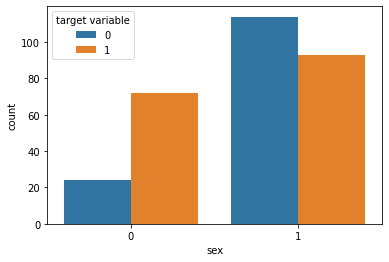

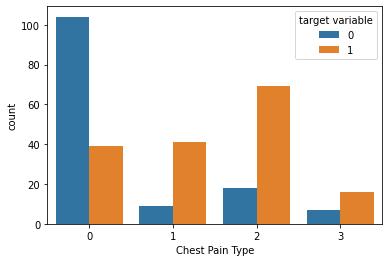

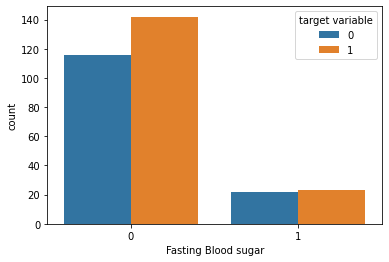

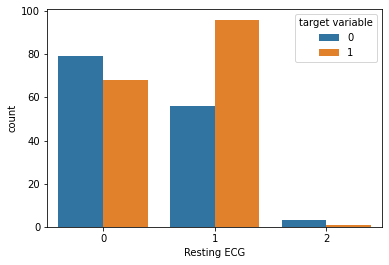

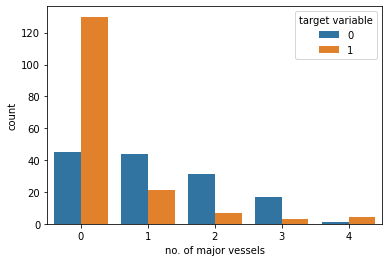

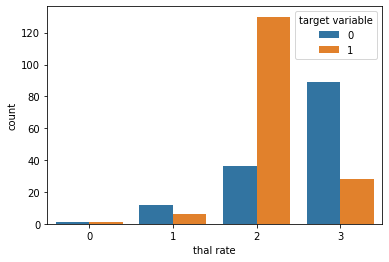

In [20]:
for column in countPoltCol:
    sns.countplot(data = heart_df, x = column, hue = 'target variable')
    plt.show()

<AxesSubplot:>

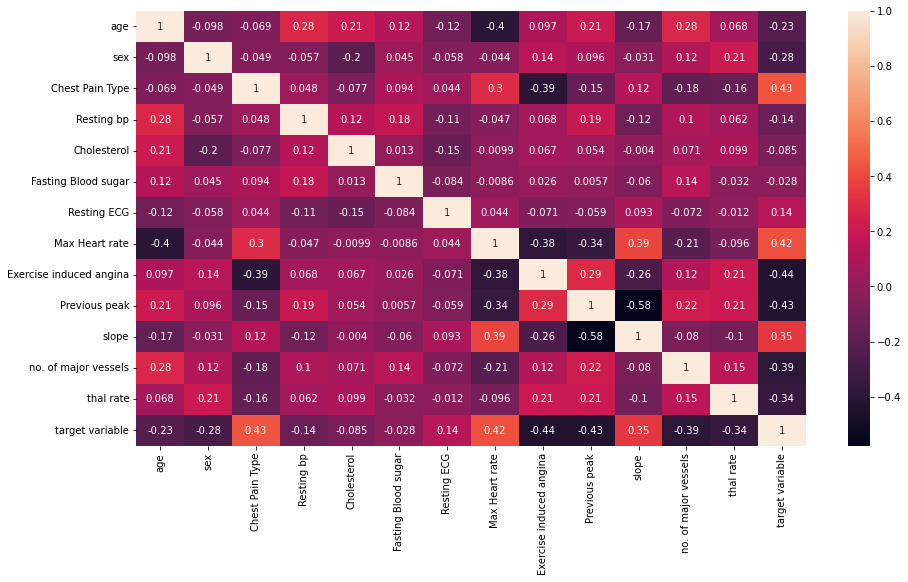

In [21]:
plt.figure(figsize = (15, 8))
sns.heatmap(data = heart_df.corr(), annot = True)

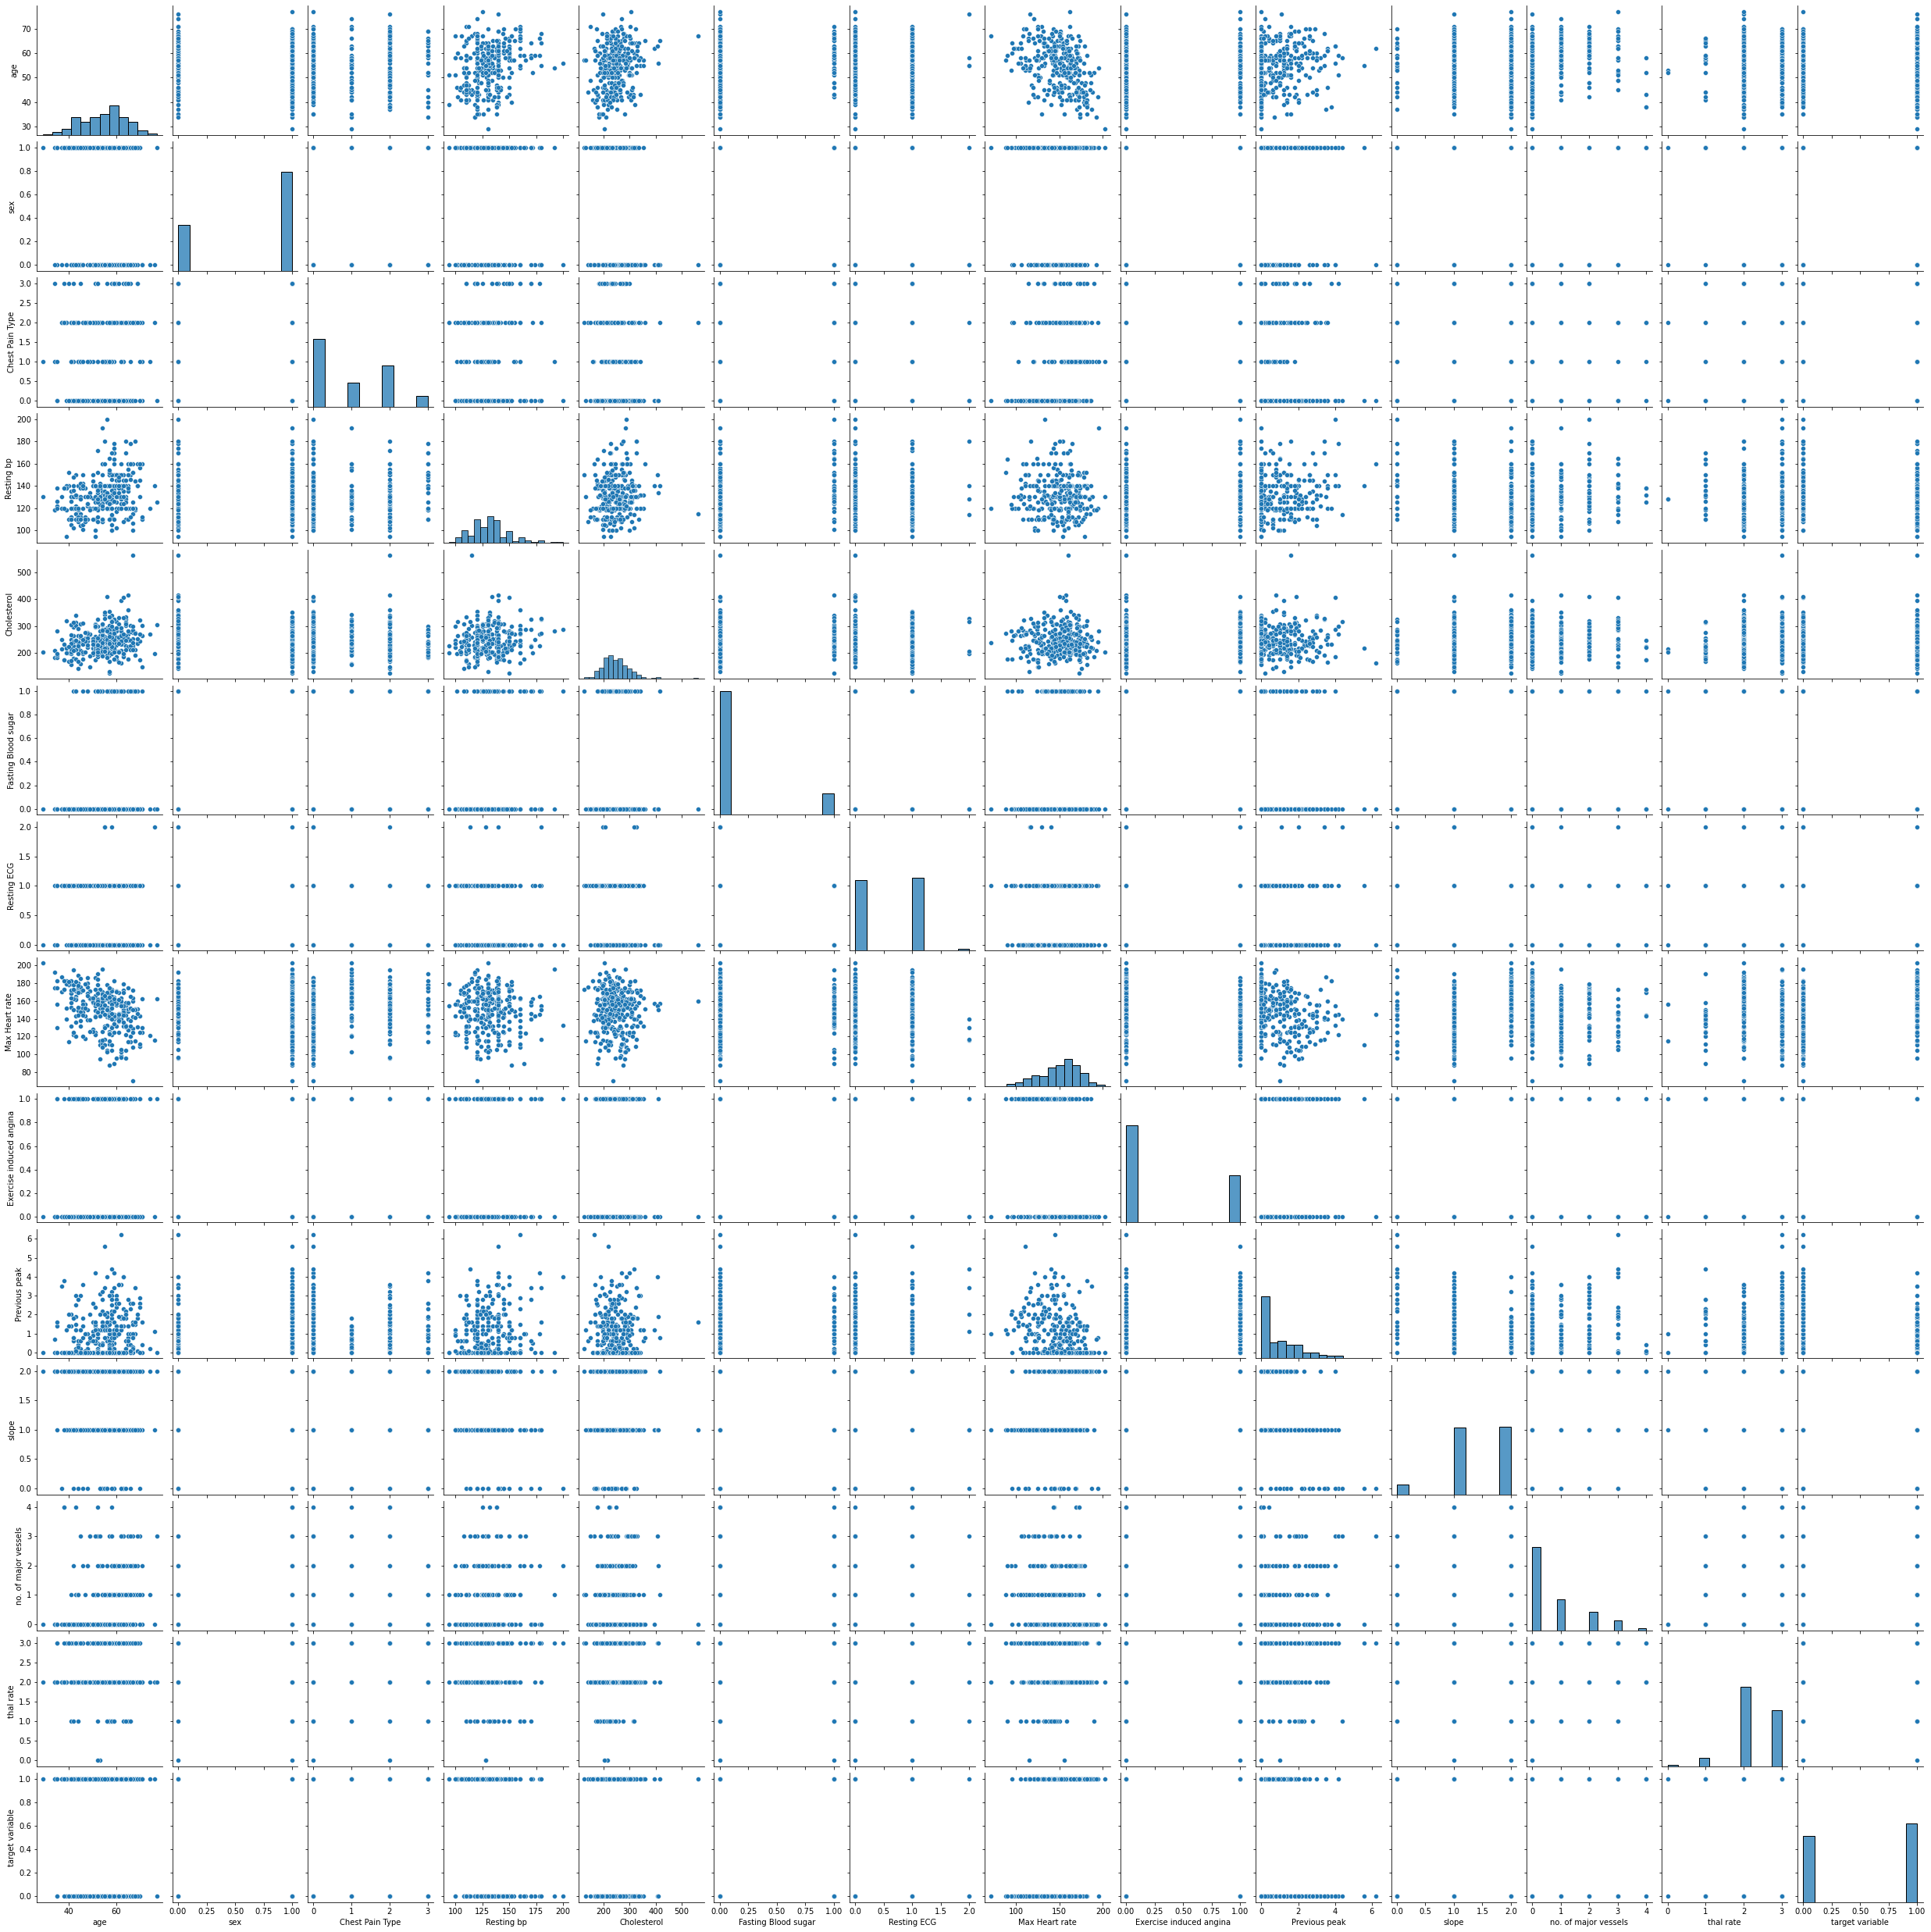

In [22]:
sns.pairplot(data = heart_df)

# Modeling

In [36]:
from sklearn.model_selection import train_test_split
from sklearn.preprocessing import StandardScaler, MinMaxScaler
from sklearn.linear_model import LogisticRegression
from sklearn.ensemble import RandomForestClassifier,GradientBoostingClassifier
from sklearn.neighbors import KNeighborsClassifier
from sklearn.svm import SVC
from sklearn.metrics import accuracy_score, confusion_matrix
import warnings
warnings.simplefilter(action="ignore", category=FutureWarning)

In [105]:
Y = heart_df['target variable']
X = heart_df.drop(columns = 'target variable')

In [106]:
x_train, x_test, y_train, y_test = train_test_split(X, Y, test_size=0.2, shuffle=True, random_state=11)
print("shape of training set " + str(x_train.shape))
print("shape of testing set " + str(x_test.shape))

shape of training set (242, 13)
shape of testing set (61, 13)


In [107]:
from sklearn import tree

In [108]:
clf = tree.DecisionTreeClassifier()

In [109]:
clf = clf.fit(x_train, y_train) #fit training data to the model

In [110]:
predicted = clf.predict(x_test)
predicted

array([0, 1, 0, 0, 1, 1, 1, 1, 0, 1, 0, 0, 0, 1, 1, 0, 1, 1, 1, 1, 1, 0,
       0, 1, 1, 0, 1, 0, 1, 0, 1, 0, 1, 1, 0, 1, 1, 0, 0, 0, 0, 1, 1, 1,
       1, 1, 0, 0, 0, 0, 1, 1, 0, 0, 1, 0, 1, 0, 0, 1, 1])

In [111]:
clf.score(x_test, y_test)

0.7049180327868853

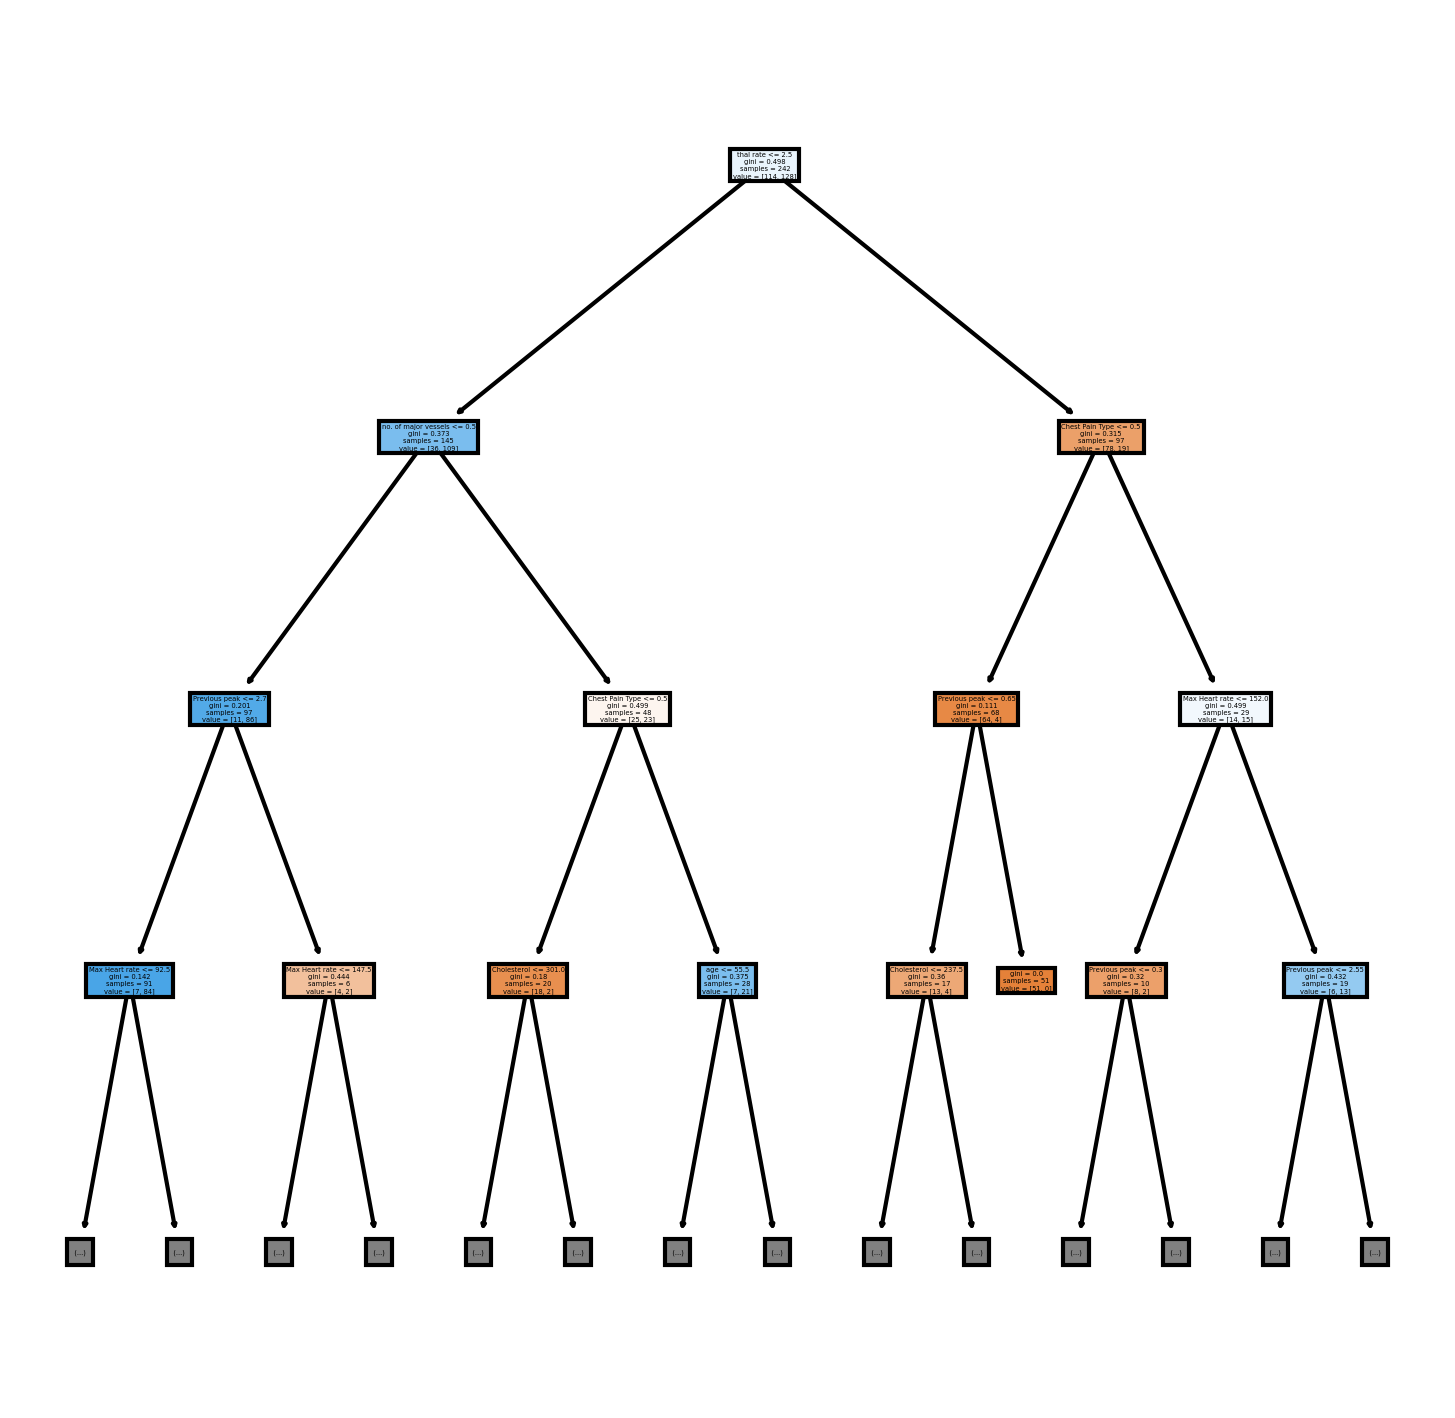

In [112]:
fig, axes = plt.subplots(nrows = 1,ncols = 1, figsize = (6,6), dpi = 300)
tree.plot_tree(clf, max_depth = 3, feature_names = X.columns, filled = True)
plt.show()

In [113]:
fi = clf.feature_importances_ #feature importance array
fi = pd.Series(data = fi, index = X.columns) #convert to Pandas series for plotting
fi.sort_values(ascending=False, inplace=True) #sort descending

/var/folders/0h/x161772j7wbgqhr3jhmhggs00000gn/T/ipykernel_12632/3876163039.py:4: UserWarning: FixedFormatter should only be used together with FixedLocator
  chart.set_xticklabels(chart.get_xticklabels(), rotation=45, horizontalalignment='right')


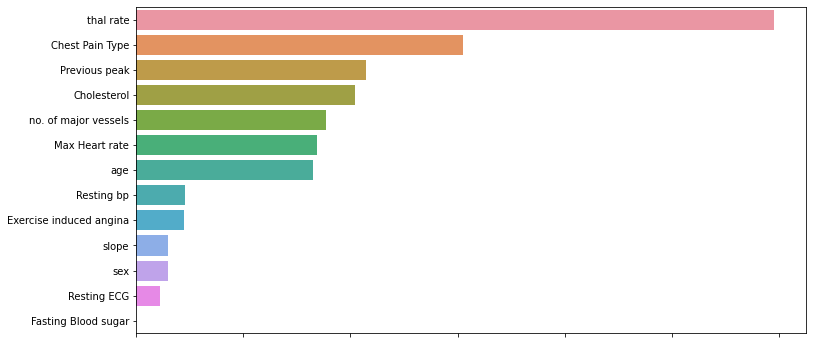

In [114]:
#create bar plot
plt.figure(figsize=(12, 6))
chart = sns.barplot(x=fi, y=fi.index)
chart.set_xticklabels(chart.get_xticklabels(), rotation=45, horizontalalignment='right')
plt.show()

In [115]:
from sklearn.model_selection import cross_validate
from sklearn import metrics
import numpy as np

In [116]:
X = heart_df.drop(columns = ['target variable']) #dependent set
y = heart_df['target variable'] #independent set
X_train, X_test, y_train, y_test = train_test_split( X, y, test_size = 0.3 ) #split into training and test

In [117]:
clf = tree.DecisionTreeClassifier() #instantiate decision tree class
clf = clf.fit(X_train, y_train) #fit data

In [118]:
cvs = cross_validate(clf, X, y, cv = 10, return_estimator=True)

In [119]:
score = cvs['test_score'].mean()
score

0.781505376344086

In [120]:
cvs['estimator']

[DecisionTreeClassifier(),
 DecisionTreeClassifier(),
 DecisionTreeClassifier(),
 DecisionTreeClassifier(),
 DecisionTreeClassifier(),
 DecisionTreeClassifier(),
 DecisionTreeClassifier(),
 DecisionTreeClassifier(),
 DecisionTreeClassifier(),
 DecisionTreeClassifier()]

In [121]:
fi = []
classification_reports = []
for i in cvs['estimator']:
    fi.append(list(i.feature_importances_))
    
    
#average column-wise 
fi_avg = np.mean(fi, axis = 0)

/var/folders/0h/x161772j7wbgqhr3jhmhggs00000gn/T/ipykernel_12632/1930616372.py:6: UserWarning: FixedFormatter should only be used together with FixedLocator
  chart.set_xticklabels(chart.get_xticklabels(), rotation=45, horizontalalignment='right')


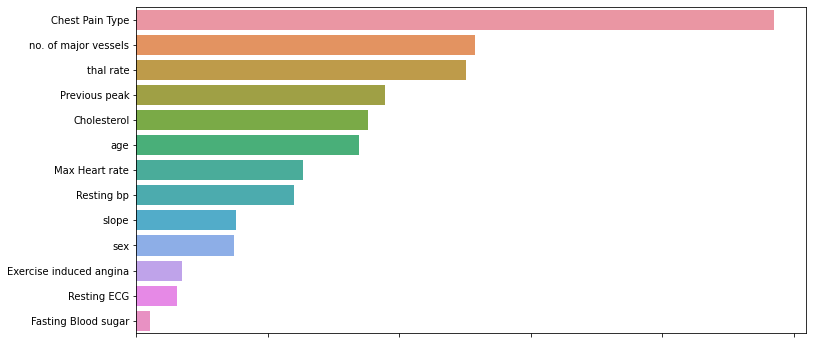

In [122]:
fi_avg = pd.Series(fi_avg, index = X.columns).sort_values(ascending=False) 

#create plot
plt.figure(figsize=(12, 6))
chart = sns.barplot(x=fi_avg, y=fi_avg.index)
chart.set_xticklabels(chart.get_xticklabels(), rotation=45, horizontalalignment='right')
plt.show()

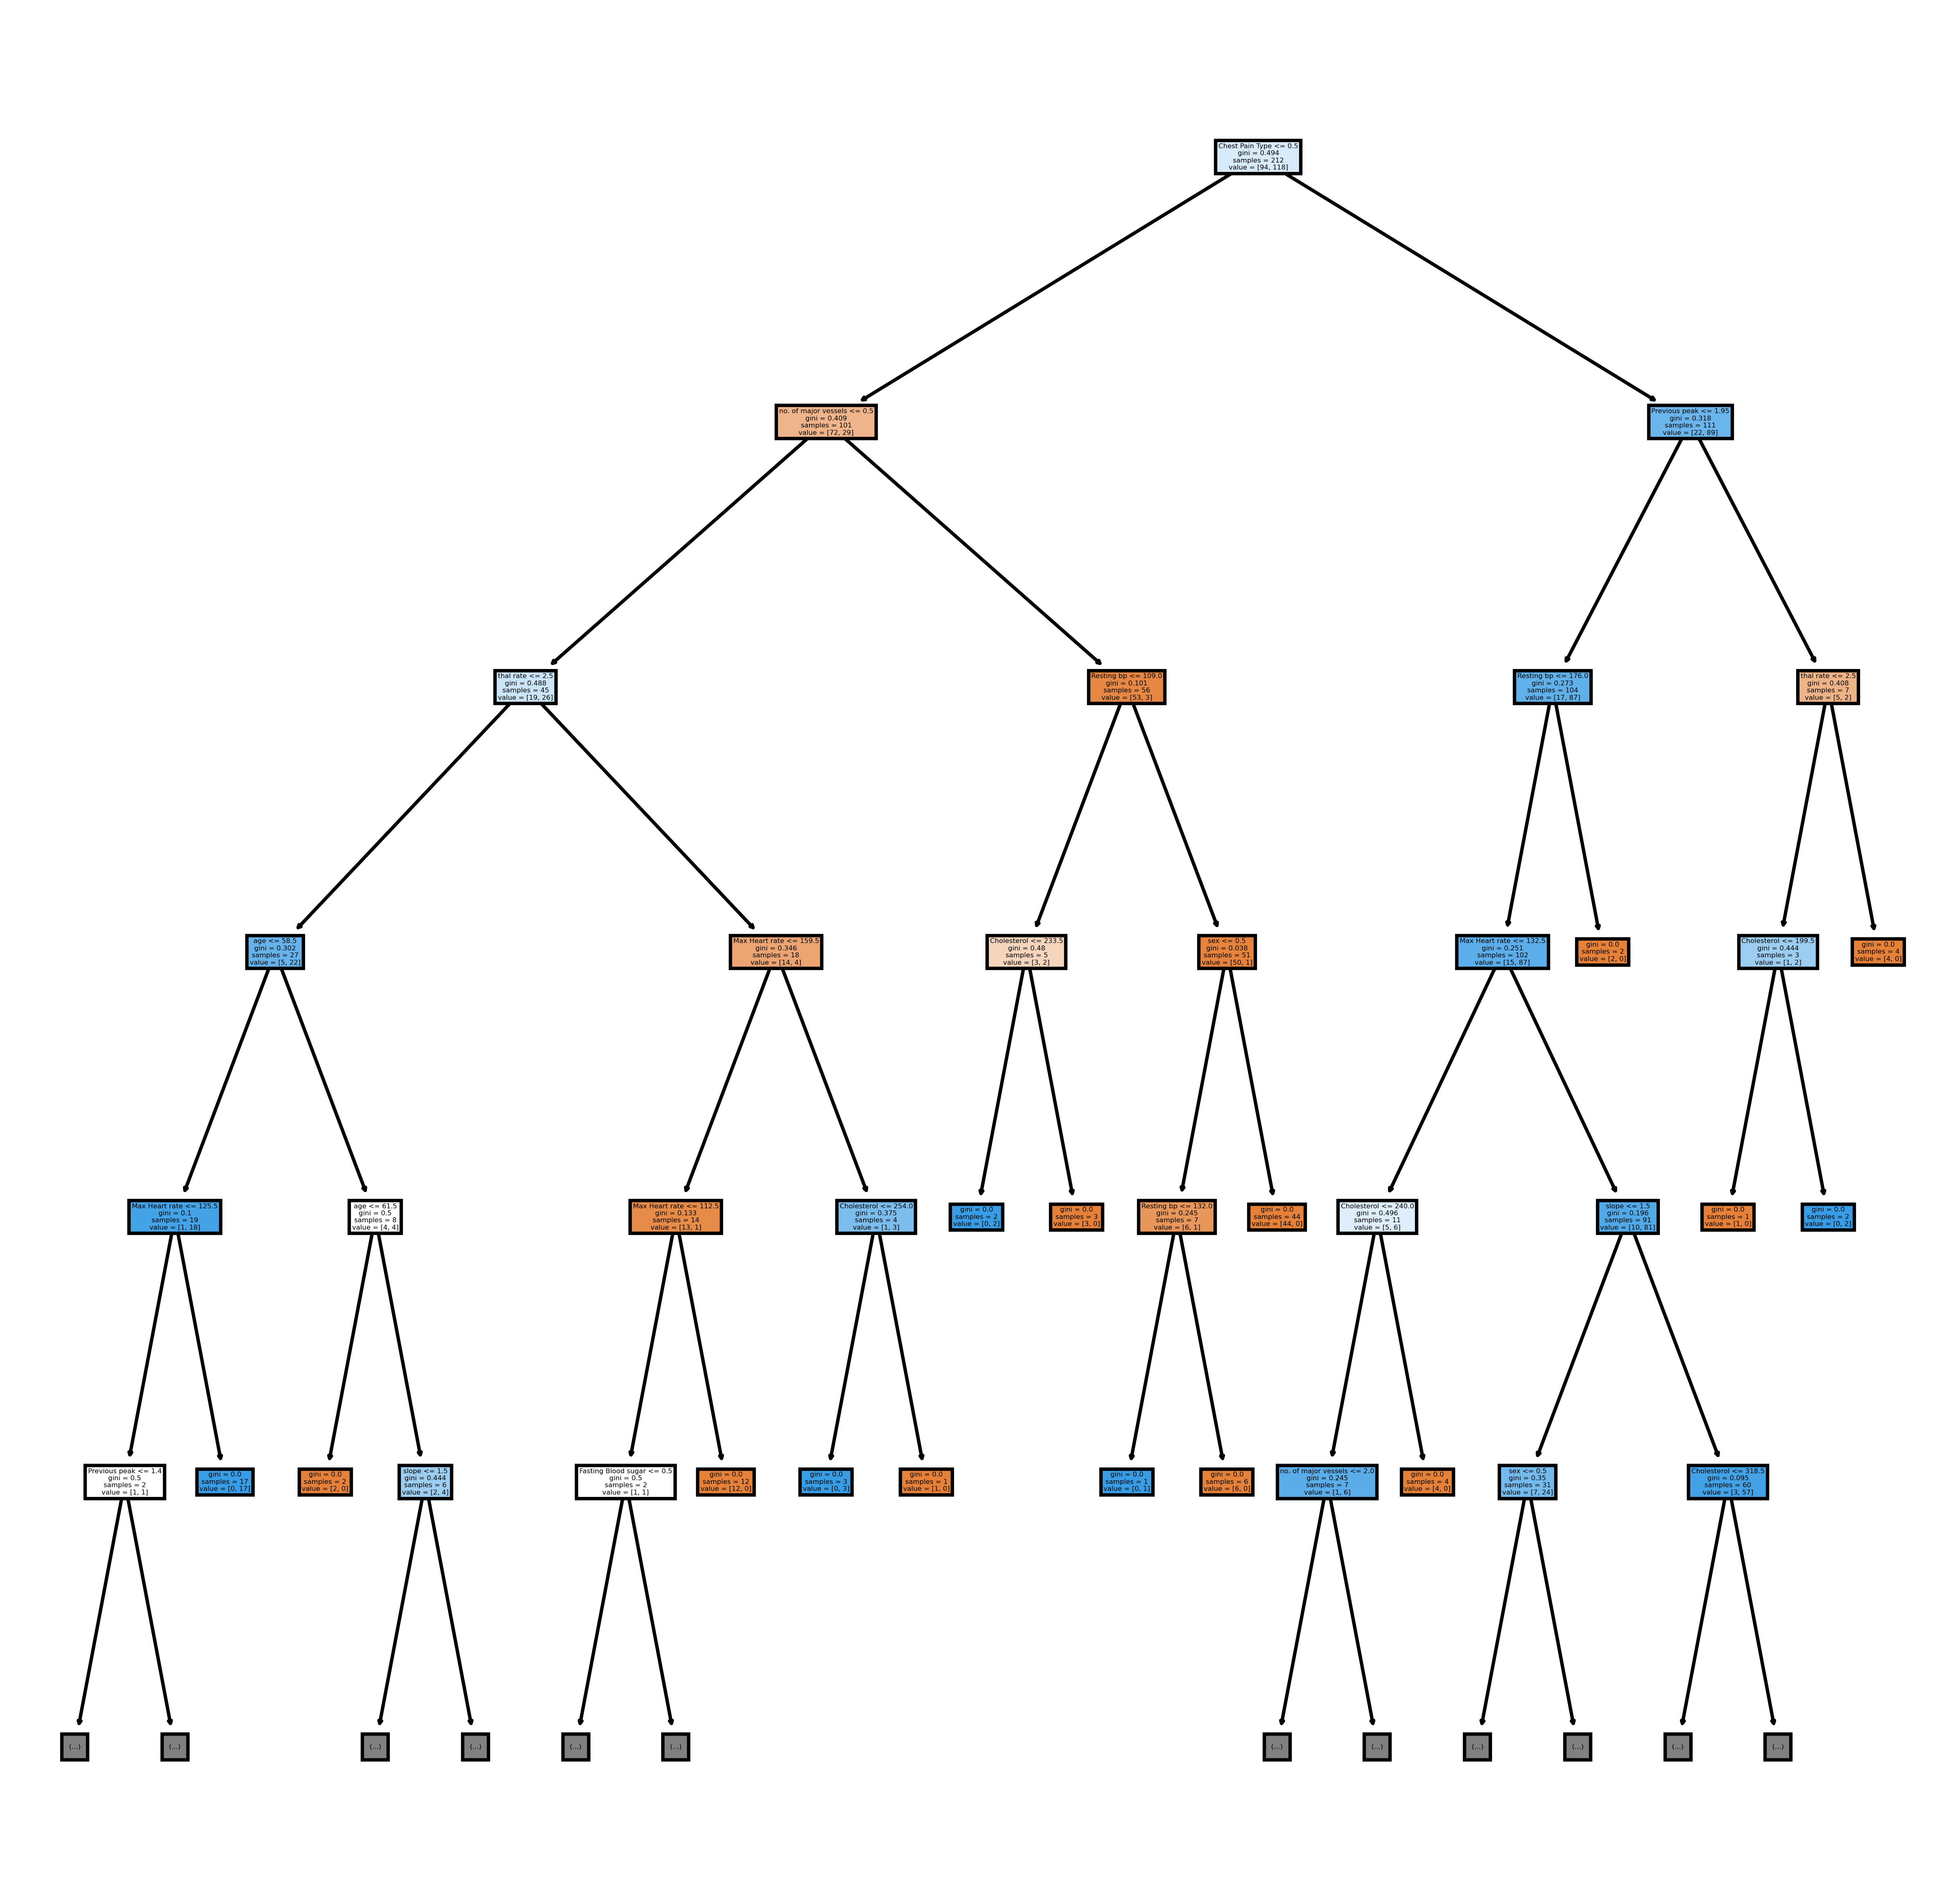

In [123]:
fig, axes = plt.subplots(nrows = 1,ncols = 1, figsize = (10,10), dpi=600)
tree.plot_tree(clf, max_depth = 5, feature_names = X.columns, filled=True)
plt.show()

In [124]:
predicted = clf.predict(X_test)
print(metrics.classification_report(y_test, predicted))

              precision    recall  f1-score   support

           0       0.75      0.68      0.71        44
           1       0.73      0.79      0.76        47

    accuracy                           0.74        91
   macro avg       0.74      0.73      0.73        91
weighted avg       0.74      0.74      0.74        91



In [125]:
Y = heart_df['target variable']
X = heart_df.drop(columns = 'target variable')
scaler = MinMaxScaler()
scaler.fit(X)
X = scaler.transform(X)

In [126]:
x_train, x_test, y_train, y_test = train_test_split(X, Y, test_size=0.2, shuffle=True, random_state=11)
print("shape of training set " + str(x_train.shape))
print("shape of testing set " + str(x_test.shape))

shape of training set (242, 13)
shape of testing set (61, 13)


In [127]:
models = {
    "Logistic Regression": LogisticRegression(),
    "SVM": SVC(C = 0.5),
    "Random Forest": RandomForestClassifier(n_estimators = 3),
    "KNN": KNeighborsClassifier(n_neighbors = 5),
    "Gradient Boosting": GradientBoostingClassifier(n_estimators = 100, learning_rate = 0.01)}
    
results = []
for name, model in models.items():
  model.fit(x_train, y_train)
  y_train_pred = model.predict(x_train)
  y_pred = model.predict(x_test)
  train_acc= accuracy_score(y_train, y_train_pred)
  test_acc= accuracy_score(y_test, y_pred)
  results.append([name, train_acc, test_acc])

df_results = pd.DataFrame(results, columns=["Model Name", "Training accuracy", "Test accuracy"])
df_results

,Model Name,Training accuracy,Test accuracy
0,Logistic Regression,0.859504,0.786885
1,SVM,0.880165,0.836066
2,Random Forest,0.946281,0.721311
3,KNN,0.871901,0.852459
4,Gradient Boosting,0.913223,0.754098


<AxesSubplot:>

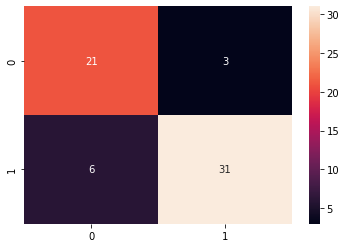

In [128]:
KNN = KNeighborsClassifier(n_neighbors = 5)
KNN.fit(x_train, y_train)

y_pred = KNN.predict(x_test)
con_matrix = confusion_matrix(y_test, y_pred)

sns.heatmap(con_matrix, annot = True)